In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from datetime import timedelta
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from statsmodels.tsa.api import Holt

In [2]:
covid=pd.read_csv('covid_19_data.csv')

covid.head(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.0,0.0,0.0


In [3]:
covid.tail(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
18317,18318,04/24/2020,Virginia,US,2020-04-25 06:31:19,11594.0,411.0,0.0
18318,18319,04/24/2020,Washington,US,2020-04-25 06:31:19,12977.0,722.0,0.0
18319,18320,04/24/2020,West Virginia,US,2020-04-25 06:31:19,1010.0,32.0,0.0
18320,18321,04/24/2020,Western Australia,Australia,2020-04-25 06:31:19,548.0,8.0,340.0
18321,18322,04/24/2020,Wisconsin,US,2020-04-25 06:31:19,5356.0,263.0,0.0
18322,18323,04/24/2020,Wyoming,US,2020-04-25 06:31:19,473.0,7.0,0.0
18323,18324,04/24/2020,Xinjiang,Mainland China,2020-04-25 06:31:19,76.0,3.0,73.0
18324,18325,04/24/2020,Yukon,Canada,2020-04-25 06:31:19,11.0,0.0,0.0
18325,18326,04/24/2020,Yunnan,Mainland China,2020-04-25 06:31:19,185.0,2.0,180.0
18326,18327,04/24/2020,Zhejiang,Mainland China,2020-04-25 06:31:19,1268.0,1.0,1256.0


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, 

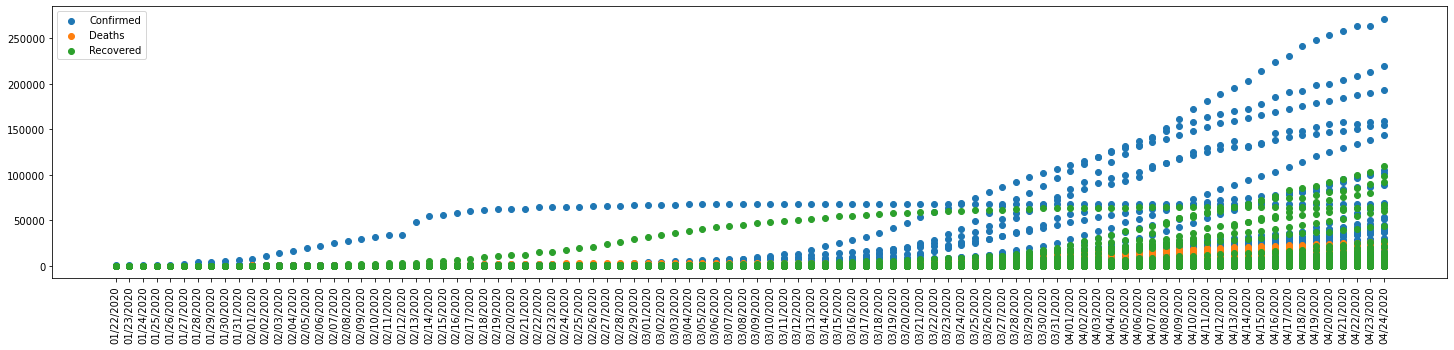

In [4]:
plt.figure(figsize=(25,5))
plt.scatter(covid["ObservationDate"],covid["Confirmed"],label='Confirmed')
plt.scatter(covid["ObservationDate"],covid["Deaths"],label='Deaths')
plt.scatter(covid["ObservationDate"],covid["Recovered"],label='Recovered')
plt.legend()
plt.xticks(rotation=90)

In [5]:
#Size and shape
print("----shape----")
print(covid.shape)

print("----null values----")
print(covid.isnull().sum())

----shape----
(18327, 8)
----null values----
SNo                   0
ObservationDate       0
Province/State     9277
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64


In [6]:
covid.dtypes

SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object

In [7]:
#Droping Sno
covid.drop(["SNo"],1,inplace=True)

C:\Users\tarna\AppData\Local\Temp/ipykernel_17148/1351284848.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  covid.drop(["SNo"],1,inplace=True)


In [8]:
covid.head()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [9]:
covid["ObservationDate"]=pd.to_datetime(covid["ObservationDate"])

In [10]:
covid.head()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [11]:
#Grouping
datewise=covid.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})

In [12]:
datewise

,Confirmed,Recovered,Deaths
ObservationDate,,,
2020-01-22,555.0,28.0,17.0
2020-01-23,653.0,30.0,18.0
2020-01-24,941.0,36.0,26.0
2020-01-25,1438.0,39.0,42.0
2020-01-26,2118.0,52.0,56.0
...,...,...,...
2020-04-20,2472259.0,645738.0,169986.0
2020-04-21,2549123.0,679819.0,176583.0
2020-04-22,2623960.0,709694.0,183066.0


In [13]:
print("Basic Information")
print("Total number of Confirmed cases around the world",datewise["Confirmed"].iloc[-1])
print("Total number of Recovered cases around the world",datewise["Recovered"].iloc[-1])
print("Total number of Deaths cases around the world",datewise["Deaths"].iloc[-1])
print("Total number of active cases around the world",(datewise["Confirmed"].iloc[-1]-datewise["Recovered"].iloc[-1]-datewise["Deaths"].iloc[-1]))
print("Total number of closed cases around the world",(datewise["Recovered"].iloc[-1]+datewise["Deaths"].iloc[-1]))

Basic Information
Total number of Confirmed cases around the world 2811193.0
Total number of Recovered cases around the world 793601.0
Total number of Deaths cases around the world 197159.0
Total number of active cases around the world 1820433.0
Total number of closed cases around the world 990760.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93]),
 [Text(0, 0, '2020-01-22'),
  Text(1, 0, '2020-01-23'),
  Text(2, 0, '2020-01-24'),
  Text(3, 0, '2020-01-25'),
  Text(4, 0, '2020-01-26'),
  Text(5, 0, '2020-01-27'),
  Text(6, 0, '2020-01-28'),
  Text(7, 0, '2020-01-29'),
  Text(8, 0, '2020-01-30'),
  Text(9, 0, '2020-01-31'),
  Text(10, 0, '2020-02-01'),
  Text(11, 0, '2020-02-02'),
  Text(12, 0, '2020-02-03'),
  Text(13, 0, '2020-02-04'),
  Text(14, 0, '2020-02-05'),
  Text(15, 0, '2020-02-06'),
  Text(16, 0, '2020-02-07'),
  Text(17, 0, '2020-02-08'),
  Text(18, 0, '2020-02-09'),
  Text(19, 0, '2020-02-10'),
  Te

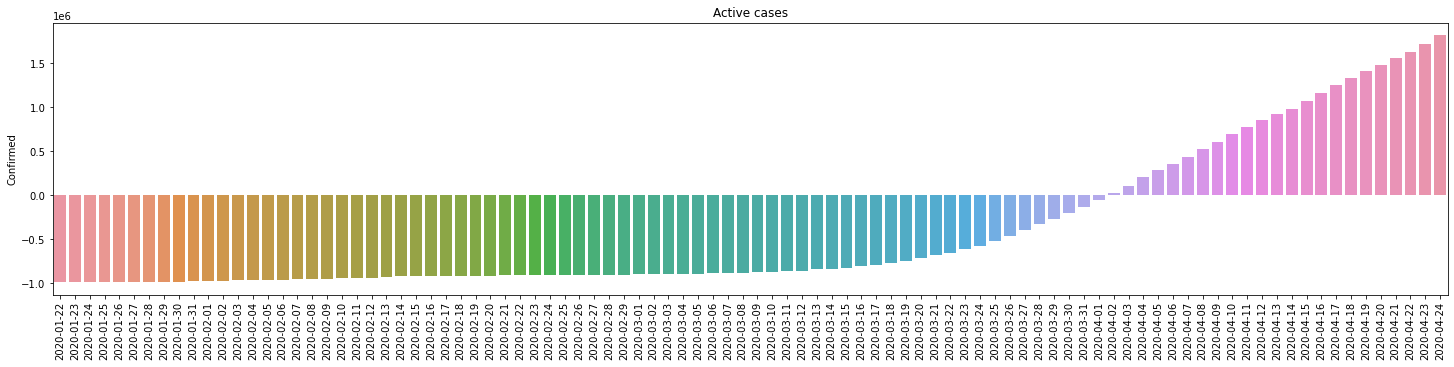

In [14]:
plt.figure(figsize=(25,5))
sns.barplot(x=datewise.index.date,y=datewise["Confirmed"]-datewise["Recovered"].iloc[-1]-datewise["Deaths"].iloc[-1])
plt.title("Active cases")
plt.xticks(rotation=90)

C:\Users\tarna\AppData\Local\Temp/ipykernel_17148/3822376142.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  datewise["WeekofYear"]=datewise.index.weekofyear


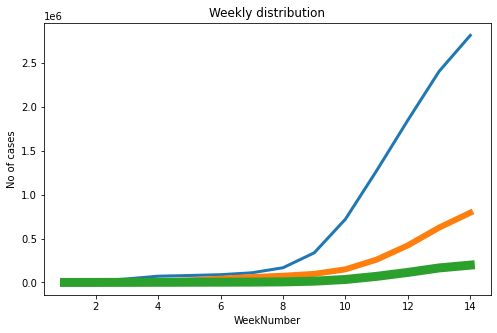

In [15]:
datewise["WeekofYear"]=datewise.index.weekofyear
week_num=[]
weekwise_confirmed=[]
weekwise_recovered=[]
weekwise_deaths=[]

w=1
for i in list(datewise["WeekofYear"].unique()):
    weekwise_confirmed.append(datewise[datewise["WeekofYear"]==i]["Confirmed"].iloc[-1])
    weekwise_recovered.append(datewise[datewise["WeekofYear"]==i]["Recovered"].iloc[-1])
    weekwise_deaths.append(datewise[datewise["WeekofYear"]==i]["Deaths"].iloc[-1])
    week_num.append(w)
    w+=1
    
plt.figure(figsize=(8,5))
plt.plot(week_num,weekwise_confirmed,linewidth=3)
plt.plot(week_num,weekwise_recovered,linewidth=6)
plt.plot(week_num,weekwise_deaths,linewidth=9)

plt.xlabel("WeekNumber")
plt.ylabel("No of cases")
plt.title("Weekly distribution")

plt.show()

Text(0.5, 1.0, 'Weekly increase in no of death cases')

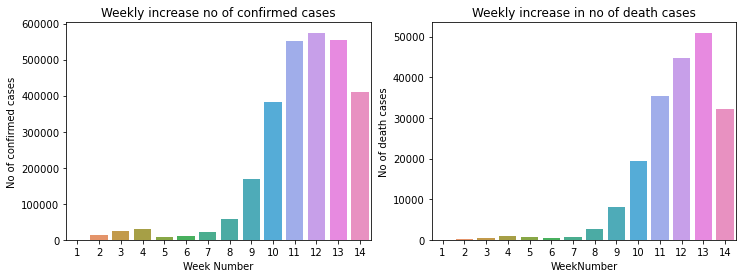

In [16]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,4))
sns.barplot(x=week_num,y=pd.Series(weekwise_confirmed).diff().fillna(0),ax=ax1)
sns.barplot(x=week_num,y=pd.Series(weekwise_deaths).diff().fillna(0),ax=ax2)
#sns.barplot(x=week_num,y=pd.Series(weekwise_confirmed).diff().fillna(0),ax=ax1)
ax1.set_xlabel("Week Number")
ax2.set_xlabel("WeekNumber")
ax1.set_ylabel("No of confirmed cases")
ax2.set_ylabel("No of death cases")
ax1.set_title("Weekly increase no of confirmed cases")
ax2.set_title("Weekly increase in no of death cases")

Average increase in no of confirmed cases everyday: 590756.0
Average increase in no of recovered cases everyday: 149061.0
Average increase in no of death cases everyday: 35227.0


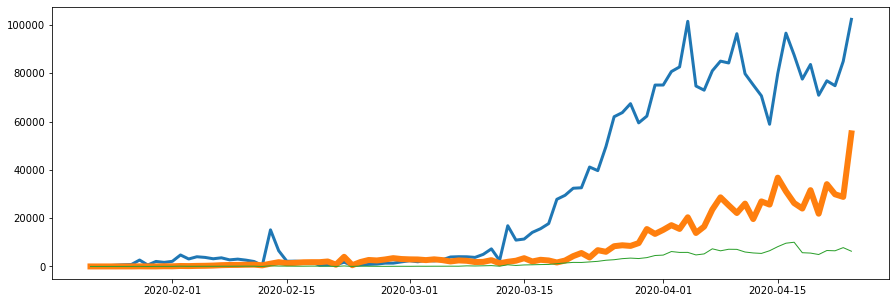

In [17]:
#Mean value of different values

print("Average increase in no of confirmed cases everyday:",np.round(datewise["Confirmed"].fillna(0).mean()))
print("Average increase in no of recovered cases everyday:",np.round(datewise["Recovered"].fillna(0).mean()))
print("Average increase in no of death cases everyday:",np.round(datewise["Deaths"].fillna(0).mean()))

plt.figure(figsize=(15,5))
plt.plot(datewise["Confirmed"].diff().fillna(0),label="Daily increase in confirmed cases",linewidth=3)
plt.plot(datewise["Recovered"].diff().fillna(0),label="Daily increase in recovered cases",linewidth=6)
plt.plot(datewise["Deaths"].diff().fillna(0),label="Daily increase in death cases",linewidth=1)

In [18]:
countrywise=covid[covid["ObservationDate"]==covid["ObservationDate"].max()].groupby(["Country/Region"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"}).sort_values(["Confirmed"],ascending=False)
countrywise["Mortality"]=(countrywise["Deaths"]/countrywise["Confirmed"])*100
countrywise["Recovery"]=(countrywise["Recovered"]/countrywise["Confirmed"])*100

Text(0.5, 1.0, 'Top 15 countries as per number of recovered cases')

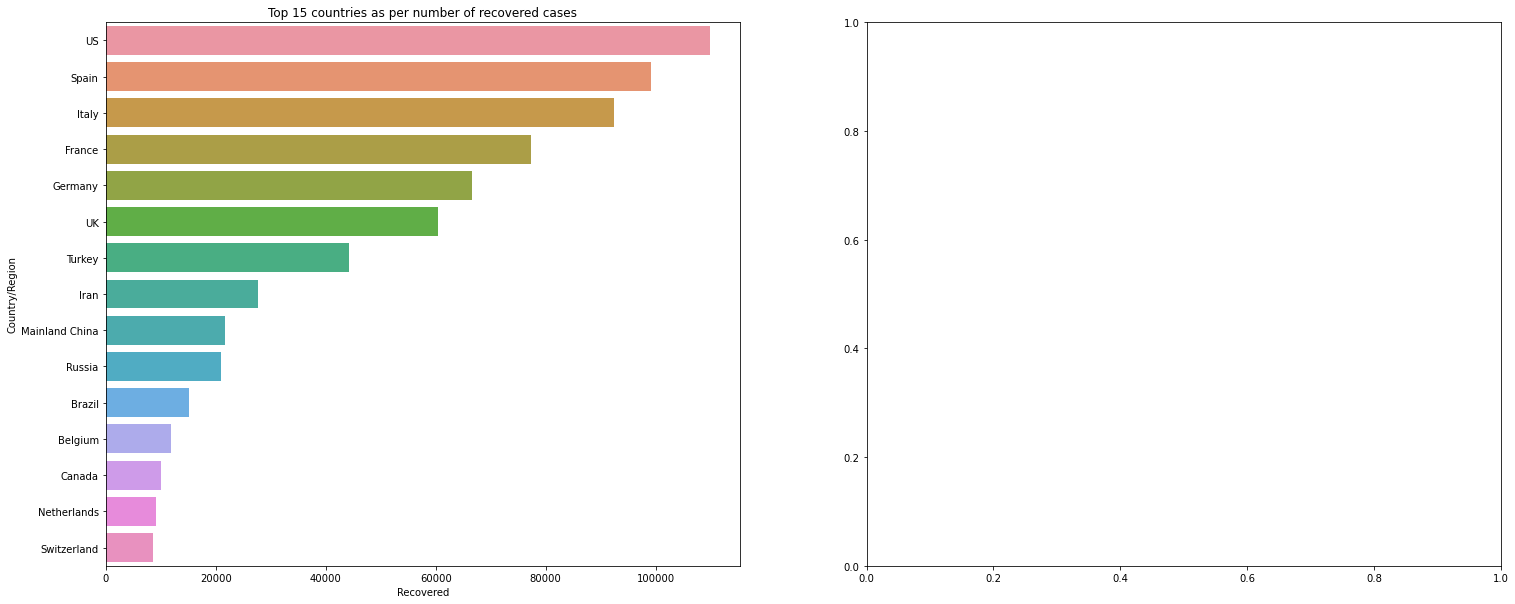

In [19]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(25,10))
top_15confirmed=countrywise.sort_values(["Confirmed"],ascending=False).head(15)
top_15deaths=countrywise.sort_values(["Deaths"],ascending=False).head(15)
top_15recovered=countrywise.sort_values(["Recovered"],ascending=False).head(15)

#sns.barplot(x=top_15confirmed["Confirmed"],y=top_15confirmed.index,ax=ax1)
#ax1.set_title("Top 15 countries as per number of confirmed cases")

sns.barplot(x=top_15deaths["Deaths"],y=top_15confirmed.index,ax=ax1)
ax1.set_title("Top 15 countries as per number of deaths cases")

sns.barplot(x=top_15recovered["Recovered"],y=top_15confirmed.index,ax=ax1)
ax1.set_title("Top 15 countries as per number of recovered cases")

In [20]:
covid

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
18322,2020-04-24,Wyoming,US,2020-04-25 06:31:19,473.0,7.0,0.0
18323,2020-04-24,Xinjiang,Mainland China,2020-04-25 06:31:19,76.0,3.0,73.0
18324,2020-04-24,Yukon,Canada,2020-04-25 06:31:19,11.0,0.0,0.0
18325,2020-04-24,Yunnan,Mainland China,2020-04-25 06:31:19,185.0,2.0,180.0


In [21]:
datewise

,Confirmed,Recovered,Deaths,WeekofYear
ObservationDate,,,,
2020-01-22,555.0,28.0,17.0,4
2020-01-23,653.0,30.0,18.0,4
2020-01-24,941.0,36.0,26.0,4
2020-01-25,1438.0,39.0,42.0,4
2020-01-26,2118.0,52.0,56.0,4
...,...,...,...,...
2020-04-20,2472259.0,645738.0,169986.0,17
2020-04-21,2549123.0,679819.0,176583.0,17
2020-04-22,2623960.0,709694.0,183066.0,17


In [22]:
countrywise

,Confirmed,Recovered,Deaths,Mortality,Recovery
Country/Region,,,,,
US,905333.0,99079.0,51949.0,5.738110,10.943929
Spain,219764.0,92355.0,22524.0,10.249176,42.024626
Italy,192994.0,60498.0,25969.0,13.455859,31.347089
France,159952.0,44271.0,22279.0,13.928554,27.677678
Germany,154999.0,109800.0,5760.0,3.716153,70.839167
...,...,...,...,...,...
Bhutan,7.0,3.0,0.0,0.000000,42.857143
Western Sahara,6.0,5.0,0.0,0.000000,83.333333
South Sudan,5.0,0.0,0.0,0.000000,0.000000


In [23]:
india_data=covid[covid["Country/Region"]=="India"]
datewise_india=india_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
print(datewise_india.iloc[-1])
print("Total Active cases",datewise_india["Confirmed"].iloc[-1]-datewise_india["Recovered"].iloc[-1]-datewise_india["Deaths"].iloc[-1])
print("Total Closed cases",datewise_india["Recovered"].iloc[-1]+datewise_india["Deaths"].iloc[-1])

Confirmed    24530.0
Recovered     5498.0
Deaths         780.0
Name: 2020-04-24 00:00:00, dtype: float64
Total Active cases 18252.0
Total Closed cases 6278.0


In [24]:
india_data

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
430,2020-01-30,NaN,India,1/30/20 16:00,1.0,0.0,0.0
491,2020-01-31,NaN,India,1/31/2020 23:59,1.0,0.0,0.0
547,2020-02-01,NaN,India,1/31/2020 8:15,1.0,0.0,0.0
607,2020-02-02,NaN,India,2020-02-02T06:03:08,2.0,0.0,0.0
672,2020-02-03,NaN,India,2020-02-03T21:43:02,3.0,0.0,0.0
...,...,...,...,...,...,...,...
16803,2020-04-20,NaN,India,2020-04-20 23:44:50,18539.0,592.0,3273.0
17123,2020-04-21,NaN,India,2020-04-21 23:39:09,20080.0,645.0,3975.0
17443,2020-04-22,NaN,India,2020-04-22 23:38:57,21370.0,681.0,4370.0
17762,2020-04-23,NaN,India,2020-04-24 03:31:35,23077.0,721.0,5012.0


In [25]:
datewise_india

,Confirmed,Recovered,Deaths
ObservationDate,,,
2020-01-30,1.0,0.0,0.0
2020-01-31,1.0,0.0,0.0
2020-02-01,1.0,0.0,0.0
2020-02-02,2.0,0.0,0.0
2020-02-03,3.0,0.0,0.0
...,...,...,...
2020-04-20,18539.0,3273.0,592.0
2020-04-21,20080.0,3975.0,645.0
2020-04-22,21370.0,4370.0,681.0


C:\Users\tarna\AppData\Local\Temp/ipykernel_17148/3543655424.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  datewise_india["WeekofYear"]=datewise_india.index.weekofyear


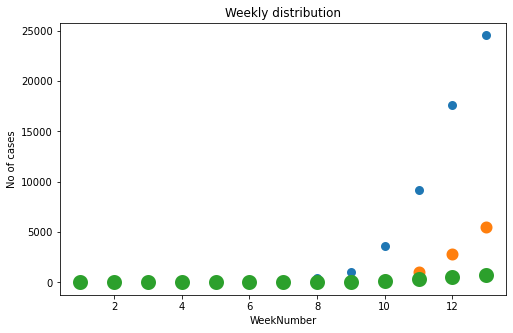

In [26]:
datewise_india["WeekofYear"]=datewise_india.index.weekofyear
week_num_india=[]
india_weekwise_confirmed=[]
india_weekwise_recovered=[]
india_weekwise_deaths=[]

w=1
for i in list(datewise_india["WeekofYear"].unique()):
    india_weekwise_confirmed.append(datewise_india[datewise_india["WeekofYear"]==i]["Confirmed"].iloc[-1])
    india_weekwise_recovered.append(datewise_india[datewise_india["WeekofYear"]==i]["Recovered"].iloc[-1])
    india_weekwise_deaths.append(datewise_india[datewise_india["WeekofYear"]==i]["Deaths"].iloc[-1])
    week_num_india.append(w)
    w+=1
    
plt.figure(figsize=(8,5))
plt.scatter(week_num_india,india_weekwise_confirmed,linewidth=3)
plt.scatter(week_num_india,india_weekwise_recovered,linewidth=6)
plt.scatter(week_num_india,india_weekwise_deaths,linewidth=9)

plt.xlabel("WeekNumber")
plt.ylabel("No of cases")
plt.title("Weekly distribution")

plt.show()

In [27]:
max_ind=datewise_india["Confirmed"].max()
china_data=covid[covid["Country/Region"]=="Mainland China"]
Italy_data=covid[covid["Country/Region"]=="Italy"]
US_data=covid[covid["Country/Region"]=="US"]
spain_data=covid[covid["Country/Region"]=="Spain"]

datewise_china=china_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_Italy=Italy_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_US=US_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_spain=spain_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})

In [28]:
datewise_china

,Confirmed,Recovered,Deaths
ObservationDate,,,
2020-01-22,547.0,28.0,17.0
2020-01-23,639.0,30.0,18.0
2020-01-24,916.0,36.0,26.0
2020-01-25,1399.0,39.0,42.0
2020-01-26,2062.0,49.0,56.0
...,...,...,...
2020-04-20,82747.0,77093.0,4632.0
2020-04-21,82779.0,77125.0,4632.0
2020-04-22,82790.0,77157.0,4632.0


In [29]:
print("It took",datewise_india[datewise_india["Confirmed"]>0].shape[0],"days in India to reach",max_ind,"Confirmed cases")
print("It took",datewise_Italy[datewise_Italy["Confirmed"]>0&(datewise_Italy["Confirmed"]<=max_ind)].shape[0],"days in Italy to reach Confirmed cases")
print("It took",datewise_US[datewise_US["Confirmed"]>0&(datewise_US["Confirmed"]<=max_ind)].shape[0],"days in US to reach Confirmed cases")
print("It took",datewise_spain[datewise_spain["Confirmed"]>0&(datewise_spain["Confirmed"]<=max_ind)].shape[0],"days in US to reach Confirmed cases")

It took 86 days in India to reach 24530.0 Confirmed cases
It took 85 days in Italy to reach Confirmed cases
It took 94 days in US to reach Confirmed cases
It took 84 days in US to reach Confirmed cases


In [30]:
datewise["Days Since"]=datewise.index-datewise.index[0]
datewise["Days Since"]=datewise["Days Since"].dt.days
train_ml=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml=datewise.iloc[:int(datewise.shape[0]*0.95):]
model_scores=[]

In [31]:
#Data fitting

lin_reg=LinearRegression(normalize=True)
svm=SVR(C=1,degree=5,kernel='poly',epsilon=0.001)
lin_reg.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))
svm.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))

C:\Users\tarna\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR(C=1, degree=5, epsilon=0.001, kernel='poly')

In [32]:
#prediction

prediction_valid_lin_reg=lin_reg.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
prediction_valid_svm=svm.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))

In [33]:
new_date=[]
new_prediction_lr=[]
new_prediction_svm=[]

datewise_new=datewise.iloc[:77,:]

for i in range(18):
    new_date.append(datewise.index[77]+timedelta(days=i))
    new_prediction_lr.append(lin_reg.predict(np.array(datewise_new["Days Since"].max()+i).reshape(-1,1))[0][0])
    new_prediction_svm.append(svm.predict(np.array(datewise_new["Days Since"].max()+i).reshape(-1,1))[0])
pd.set_option("display.float_format",lambda x:'%.f'%x)
model_prediction=pd.DataFrame(zip(new_date,new_prediction_lr,new_prediction_svm),columns=["Dates","Lr","Svr"])
model_prediction.head(10)

,Dates,Lr,Svr
0,2020-04-08,1170105,1176306
1,2020-04-09,1191795,1252827
2,2020-04-10,1213485,1333428
3,2020-04-11,1235176,1418270
4,2020-04-12,1256866,1507518
5,2020-04-13,1278556,1601342
6,2020-04-14,1300246,1699916
7,2020-04-15,1321936,1803417
8,2020-04-16,1343627,1912028
9,2020-04-17,1365317,2025936


In [34]:
datewise

,Confirmed,Recovered,Deaths,WeekofYear,Days Since
ObservationDate,,,,,
2020-01-22,555,28,17,4,0
2020-01-23,653,30,18,4,1
2020-01-24,941,36,26,4,2
2020-01-25,1438,39,42,4,3
2020-01-26,2118,52,56,4,4
...,...,...,...,...,...
2020-04-20,2472259,645738,169986,17,89
2020-04-21,2549123,679819,176583,17,90
2020-04-22,2623960,709694,183066,17,91


In [35]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.85)]
valid=datewise.iloc[int(datewise.shape[0]*0.85):]

In [36]:
holt=Holt(np.asarray(model_train["Confirmed"])).fit(smoothing_level=1.4,smoothing_trend=0.2)
y_pred=valid.copy()
y_pred["Holt"]=holt.forecast(len(valid))

C:\Users\tarna\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [37]:
holt_new_date=[]
holt_new_prediction=[]
for i in range(0,18):
    holt_new_date.append(datewise.index[-1]+timedelta(days=i))
    holt_new_prediction.append(holt.forecast((len(valid)+i))[-1])
model_prediction["Holts Linear Model Prediction"]=holt_new_prediction
model_prediction.head(10)

,Dates,Lr,Svr,Holts Linear Model Prediction
0,2020-04-08,1170105,1176306,2776590
1,2020-04-09,1191795,1252827,2855246
2,2020-04-10,1213485,1333428,2933902
3,2020-04-11,1235176,1418270,3012558
4,2020-04-12,1256866,1507518,3091214
5,2020-04-13,1278556,1601342,3169870
6,2020-04-14,1300246,1699916,3248526
7,2020-04-15,1321936,1803417,3327182
8,2020-04-16,1343627,1912028,3405838
9,2020-04-17,1365317,2025936,3484494


In [38]:
datewise.iloc[77:,:]

,Confirmed,Recovered,Deaths,WeekofYear,Days Since
ObservationDate,,,,,
2020-04-08,1511104,328661,88338,15,77
2020-04-09,1595350,353975,95455,15,78
2020-04-10,1691719,376096,102525,15,79
2020-04-11,1771514,402110,108502,15,80
2020-04-12,1846680,421722,114089,15,81
2020-04-13,1917320,448655,119482,16,82
2020-04-14,1976192,474261,125984,16,83
2020-04-15,2056055,511019,134177,16,84
2020-04-16,2152647,542107,143801,16,85


In [39]:
model_prediction

,Dates,Lr,Svr,Holts Linear Model Prediction
0,2020-04-08,1170105,1176306,2776590
1,2020-04-09,1191795,1252827,2855246
2,2020-04-10,1213485,1333428,2933902
3,2020-04-11,1235176,1418270,3012558
4,2020-04-12,1256866,1507518,3091214
5,2020-04-13,1278556,1601342,3169870
6,2020-04-14,1300246,1699916,3248526
7,2020-04-15,1321936,1803417,3327182
8,2020-04-16,1343627,1912028,3405838
9,2020-04-17,1365317,2025936,3484494


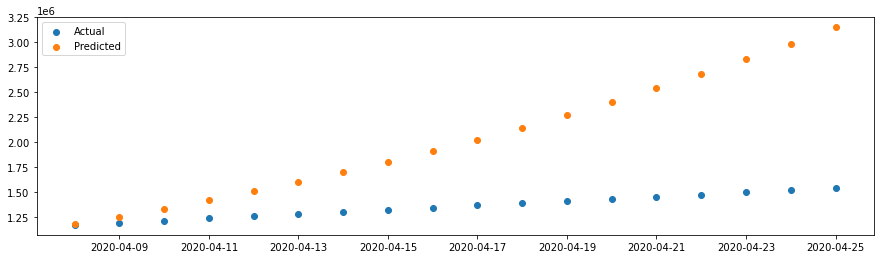

In [45]:
plt.figure(figsize=(15,4))
conf=[]
plt.scatter(model_prediction["Dates"],model_prediction["Lr"],label='Actual')
plt.scatter(model_prediction["Dates"],model_prediction["Svr"],label='Predicted')
'''for i in model_prediction["Dates"]:
    df_new = covid[covid['ObservationDate'] == i]
    to_append=[i,df_new.sum(axis=0)]
    conf.append(to_append)
plt.scatter(model_prediction["Dates"],conf,linewidth=7)'''
plt.legend()

In [41]:
df_new = covid[covid['ObservationDate'] == '2020-04-15']

In [42]:
s=df_new.sum(axis=0)
s["Confirmed"]

C:\Users\tarna\AppData\Local\Temp/ipykernel_17148/1000716230.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  s=df_new.sum(axis=0)


2056055.0